# Scipy
Scientific Python. Usually used to optimize, numerically integrate and differentiate complex function. It also has a big database of physical constants.

### Integration
Let us integrate $$\int_0^{\pi/8}\sqrt{\tan(x)}dx$$

In [ ]:
from scipy import integrate
from numpy import tan, pi, e 

In [ ]:
def tanRoot(x):
    return tan(x)**.5

In [ ]:
result = integrate.quad(tanRoot, 0, pi/8.)
result

In [ ]:
a = lambda x, y: x + y

In [ ]:
result = integrate.dblquad(lambda x, y: x**2 + y ** 2, 
                             0, 2, 0, 2)
result

In [ ]:
from numpy import inf

$$\Gamma(x)=\int_0^{\infty} t^{x-1}e^{-t}dt, x>0$$

In [ ]:
def gamma(x,t):
    return t**(x-1)*e**(-t)

In [ ]:
for x in range(1,11):
    result, error=integrate.quad(lambda t: gamma(x, t), 0, inf) #lambda empieza a ser útil
    print("%s +- %s"%(result, error))

#### Exercise
- Use an integral to approximate $\pi$.
- Use an integral to approximate $e$.

In [ ]:
integrate.quad(lambda x: (1 - x ** 2)**0.5, -1, 1)[0] * 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x=np.linspace(1,10)
result = integrate.quad(lambda t: gamma(x, t), 0, inf)
result

In [ ]:
vectorized_fun = np.vectorize(lambda x: integrate.quad(lambda t: gamma(x, t), 0, inf))
vectorized_fun

In [ ]:
result = vectorized_fun(x)
result

In [ ]:
plt.errorbar(x, result[0], yerr=result[1], marker=".")

### Findiff
Package dedicated to numerical calculation of derivatives using finite differences.

In [ ]:
import findiff

In [ ]:
import numpy as np
x = np.linspace(0, 1, 100)
f = np.sin(x)  # as an example
dx = 0.1
# Define the derivative:
d_dx = findiff.FinDiff(0, dx, 1)

# Apply it:
df_dx = d_dx(f) 
df_dx

In [ ]:
d2_dx2 = findiff.FinDiff(0, dx, 2, acc=4)
d2f_dx2 = d2_dx2(f)
d2f_dx2

## Integration of differential equations
The equation of motion for a simple pendulum (without damping and small angles) is given by: 
$$\frac{d^2\theta}{dt^2} +\frac{g}{L}\sin\theta=0.$$

Solve the above equation using `scipy.integrate.solve_ivp`. Assume initial conditions $\theta(0)=\pi/6$ and $d\theta/dt(0)=0.$

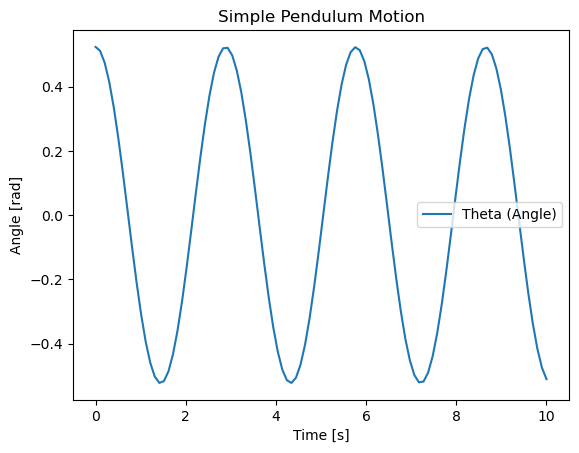

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Gravity
L = 2.0   # Length of the pendulum

# Define the ODE system
def pendulum(t, y):
    theta, omega = y
    dydt = [omega, -(g/L) * np.sin(theta)]
    return dydt

# Initial conditions: theta(0) = pi/6, dtheta/dt(0) = 0
y0 = [np.pi/6, 0]

# Time range
t_span = [0, 10]
t_eval = np.linspace(0, 10, 100)

# Solve ODE
sol = solve_ivp(pendulum, t_span, y0, t_eval=t_eval)

# Plot the results
plt.plot(sol.t, sol.y[0], label='Theta (Angle)')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.title('Simple Pendulum Motion')
plt.legend()
plt.show()

- The **Lotka-Volterra (Predator-Prey) Model** is a well-known system of nonlinear ODEs:

$$
\frac{dx}{dt} = \alpha x - \beta xy
$$
$$
\frac{dy}{dt} = \delta xy - \gamma y
$$

Where:

- $x(t)$ is the population of prey,
- $y(t)$ is the population of predators,
- $\alpha, \beta, \delta, \gamma$ are constants.

Solve the system with the following parameter values:

$
\alpha = 1.5, \, \beta = 1, \, \delta = 0.1, \, \gamma = 1
$

With initial conditions $x(0) = 10$, $y(0) = 5$, over the time interval $t \in [0, 30]$.


In [11]:
alpha, beta, delta, gamma = 1.5, 1, 0.1, 1
def lotka(t, pos):
    x, y = pos
    return [alpha * x - beta * x * y, delta * x * y - gamma * y]

result = solve_ivp(lotka, [0, 30], [10, 5], t_eval = np.linspace(0, 30, 1000))

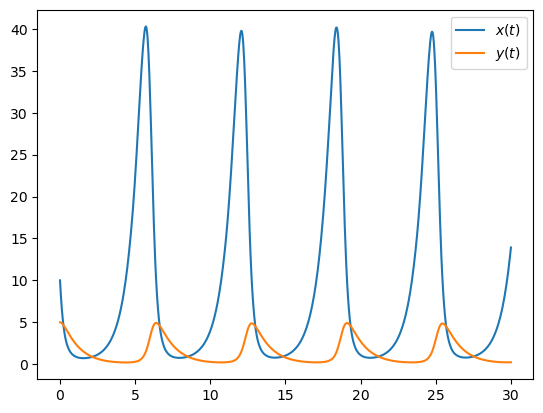

In [12]:
plt.plot(result.t, result.y[0], label = r"$x(t)$")
plt.plot(result.t, result.y[1], label = r"$y(t)$")
plt.legend()

### Optimization

In [1]:
from scipy import optimize

In [23]:
def objective(x):
    return np.sum(x ** 2)
def gradient(x):
    return 2 * x

In [24]:
result = optimize.minimize(objective, [1]*10, jac=gradient)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.38164711797325e-31
        x: [-4.441e-16 -4.441e-16 -4.441e-16 -2.220e-16  0.000e+00
            -1.110e-16  2.220e-16  3.331e-16  1.110e-16  1.110e-16]
      nit: 2
      jac: [-8.882e-16 -8.882e-16 -8.882e-16 -4.441e-16  0.000e+00
            -2.220e-16  4.441e-16  6.661e-16  2.220e-16  2.220e-16]
 hess_inv: [[ 9.500e-01 -5.000e-02 ... -5.000e-02 -5.000e-02]
            [-5.000e-02  9.500e-01 ... -5.000e-02 -5.000e-02]
            ...
            [-5.000e-02 -5.000e-02 ...  9.500e-01 -5.000e-02]
            [-5.000e-02 -5.000e-02 ... -5.000e-02  9.500e-01]]
     nfev: 3
     njev: 3

In [19]:
def objective(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

def gradient(x):
    return np.array([2*(x[0] - 1), 2*(x[1] - 2.5)])

result = optimize.minimize(objective, x0=[0, 0], method='BFGS', jac=gradient)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.465190328815662e-31
        x: [ 1.000e+00  2.500e+00]
      nit: 2
      jac: [ 4.441e-16 -8.882e-16]
 hess_inv: [[ 9.310e-01 -1.724e-01]
            [-1.724e-01  5.690e-01]]
     nfev: 3
     njev: 3

In [20]:
result = optimize.minimize(objective, x0=[0, 0], method='BFGS')
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.968344227868139e-15
        x: [ 1.000e+00  2.500e+00]
      nit: 2
      jac: [-6.956e-08  4.211e-08]
 hess_inv: [[ 9.310e-01 -1.724e-01]
            [-1.724e-01  5.690e-01]]
     nfev: 9
     njev: 3

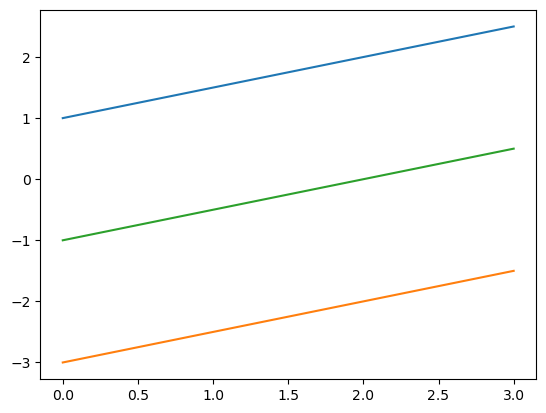

In [25]:
x = np.linspace(0, 3)
plt.plot(x, x/2 +1)
plt.plot(x, x/2-3)
plt.plot(x, x/2-1)
plt.show()

In [28]:
def objective(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

cons = ({'type': 'eq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

result = optimize.minimize(objective, x0=[0, 0], method='SLSQP', constraints=cons)
x, y = result.x
print(result.x, result.fun)
print(x-2*y+2)

[1.39999999 1.7       ] 0.8
0.0


#### Exercise
- Estimate when $x^2= \sin x$.
- Determine the fixed point(s) of the mapping $f(x,y)=(x/2, y/2) + (0.25, 0.25).$

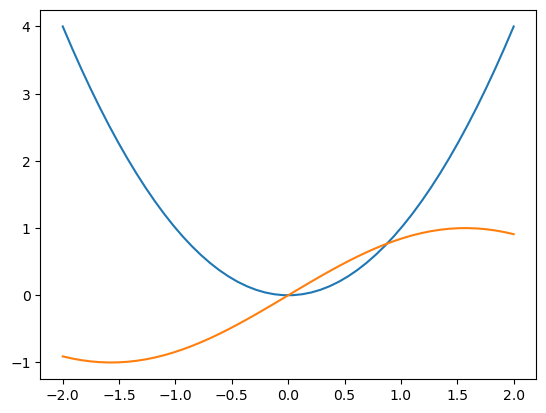

In [30]:
x = np.linspace(-2, 2)
plt.plot(x, x ** 2)
plt.plot(x, np.sin(x))

In [34]:
def objective(x):
    return x ** 2 - np.sin(x)
result = optimize.minimize(objective, 1, x)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.2324655751543299
        x: [ 4.502e-01]
      nit: 5
      jac: [-4.333e-06]
 hess_inv: [[ 4.094e-01]]
     nfev: 12
     njev: 6

In [52]:
from scipy import integrate
def objective(x):
    integral = integrate.quad(lambda t: 1/t, 1, x, epsabs=1e-15)
    return (integral[0] - 1) ** 2
result = optimize.minimize(objective, 2, tol=1e-15)
result.x[0]

np.float64(2.7182818210084645)

In [51]:
np.e

2.718281828459045

- Use ´from sklearn.datasets import load_diabetes´ to do a linear regression for the data of factors that may lead to diabetes.

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [3]:
# Load the diabetes dataset
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
# Create a dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
import numpy as np

In [80]:
X = diabetes.data
X.shape

(442, 10)

In [82]:
X = np.hstack((np.ones((X.shape[0],1)),X))
y = diabetes.target
X

array([[ 1.        ,  0.03807591,  0.05068012, ..., -0.00259226,
         0.01990749, -0.01764613],
       [ 1.        , -0.00188202, -0.04464164, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 1.        ,  0.08529891,  0.05068012, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 1.        ,  0.04170844,  0.05068012, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [ 1.        , -0.04547248, -0.04464164, ...,  0.02655962,
         0.04452873, -0.02593034],
       [ 1.        , -0.04547248, -0.04464164, ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [83]:
y.shape

(442,)

In [84]:
def objective(c):
    return np.mean(((y - X.dot(c)))**2)

In [85]:
result = optimize.minimize(objective, [0] * 11, method="BFGS", tol=1e-10)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2859.6963477691097
        x: [ 1.521e+02 -1.001e+01 -2.398e+02  5.198e+02  3.244e+02
            -7.921e+02  4.767e+02  1.010e+02  1.771e+02  7.512e+02
             6.763e+01]
      nit: 113
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
             0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
             0.000e+00]
 hess_inv: [[ 4.530e-01 -1.104e-02 ...  8.519e-02 -4.065e-02]
            [-1.104e-02  2.427e+02 ... -6.941e+01 -2.156e+01]
            ...
            [ 8.519e-02 -6.941e+01 ...  1.063e+03  6.999e+01]
            [-4.065e-02 -2.156e+01 ...  6.999e+01  2.865e+02]]
     nfev: 1464
     njev: 122

In [86]:
import matplotlib.pyplot as plt

In [87]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([ 152.13348416,  -10.0098663 , -239.81564367,  519.84592005,
        324.3846455 , -792.17563855,  476.73902101,  101.04326794,
        177.06323767,  751.27369956,   67.62669218])

5.189367057055402


(array([ 3.,  4., 13., 15., 30., 33., 28., 38., 38., 32., 37., 39., 31.,
        29., 19., 19.,  9.,  7.,  7.,  2.,  0.,  1.,  1.,  3.,  1.,  0.,
         0.,  0.,  2.,  1.]),
 array([-0.82909397, -0.74379631, -0.65849866, -0.573201  , -0.48790335,
        -0.40260569, -0.31730804, -0.23201038, -0.14671272, -0.06141507,
         0.02388259,  0.10918024,  0.1944779 ,  0.27977556,  0.36507321,
         0.45037087,  0.53566852,  0.62096618,  0.70626383,  0.79156149,
         0.87685915,  0.9621568 ,  1.04745446,  1.13275211,  1.21804977,
         1.30334743,  1.38864508,  1.47394274,  1.55924039,  1.64453805,
         1.7298357 ]),
 <BarContainer object of 30 artists>)

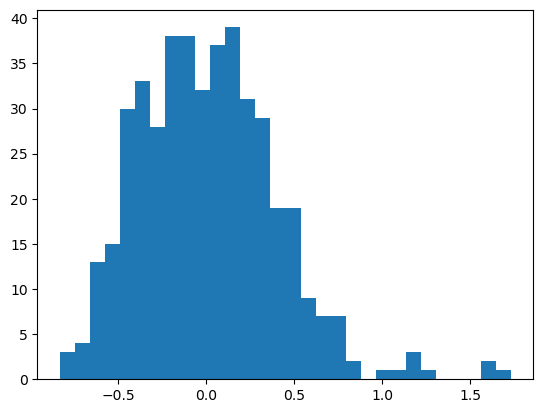

In [88]:
y_pred = X @ result.x.T
e = (y - y_pred)/y_pred
print(sum(e))
plt.hist(e, bins=30)

- - Use ´from sklearn.datasets import load_breast_cancer´ to do a linear regression for the data of factors that may lead to diabetes.

In [90]:
from sklearn.datasets import load_breast_cancer

In [92]:
data = load_breast_cancer()
X = data.data
X = np.hstack((np.ones((X.shape[0],1)),X))
y = data.target
X.shape

(569, 31)

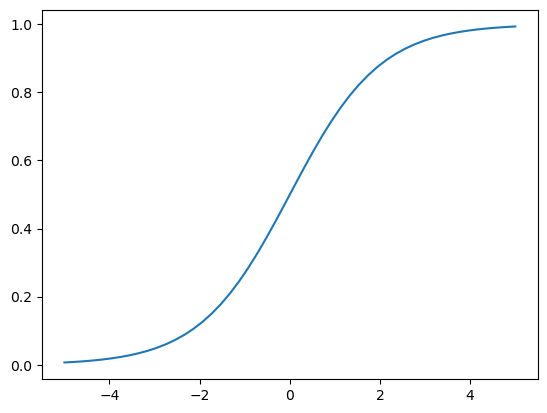

In [93]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-5,5)
plt.plot(x, sigmoid(x))

In [96]:
def objective(c):
    return np.mean((y - sigmoid(X @ c)) ** 2)

In [97]:
result = optimize.minimize(objective, [0] * (X.shape[1]))
result

/tmp/ipykernel_19744/2823034345.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.017574702957660168
        x: [ 5.298e+02  2.825e+03 ... -1.550e+03 -1.284e+02]
      nit: 135
      jac: [-3.027e-09 -4.610e-08 ... -2.328e-10 -6.985e-10]
 hess_inv: [[ 6.723e+09  3.585e+10 ... -1.966e+10 -1.628e+09]
            [ 3.585e+10  1.912e+11 ... -1.048e+11 -8.683e+09]
            ...
            [-1.966e+10 -1.048e+11 ...  5.748e+10  4.762e+09]
            [-1.628e+09 -8.683e+09 ...  4.762e+09  3.945e+08]]
     nfev: 4704
     njev: 147

In [98]:
from sklearn import metrics

/tmp/ipykernel_19744/2823034345.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


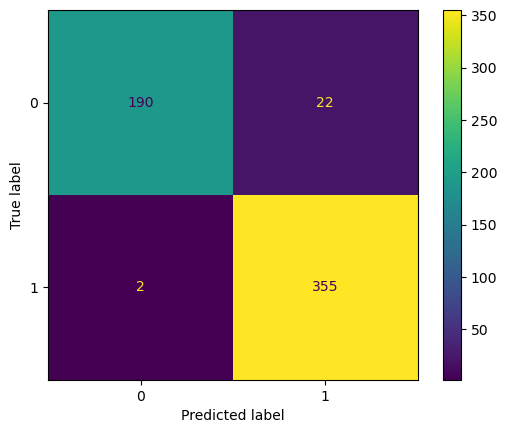

In [104]:
confusion_matrix = metrics.confusion_matrix(y, sigmoid(X @ result.x) > 0)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1]) 
cm_display.plot()
plt.show() 

### Global Optimization Methods
These methods attempt to find the global minimum of a function, which may have multiple local minima. Common methods include:

- `scipy.optimize.basinhopping`: Basin-hopping algorithm

  Basin-hopping is a stochastic algorithm that attempts to find the global minimum of a smooth scalar function. It works by iteratively performing a local optimization, followed by a random perturbation of the solution. This allows the algorithm to potentially escape local minima and explore different regions of the parameter space.
- `scipy.optimize.differential_evolution`: Differential Evolution algorithm

    Differential Evolution is a stochastic population-based method. It works by maintaining a population of candidate solutions and creating new candidate solutions by combining existing ones. It's particularly effective for problems with a continuous parameter space and doesn't require the gradient of the objective function.
  
- `scipy.optimize.shgo`: Simplicial Homology Global Optimization

    SHGO is a global optimization algorithm that uses simplicial homology and local minimizations. It's designed to handle complex, multi-modal objective functions. SHGO works by sampling points in the parameter space, building a simplicial complex, and then performing local optimizations from promising points.
  
- `scipy.optimize.dual_annealing`: Dual Annealing optimization

  Dual Annealing combines the probabilistic jump of Simulated Annealing with a local search. It's inspired by the physical process of annealing in metallurgy. The algorithm allows for both exploring the parameter space (at high "temperatures") and refining the solution (at low "temperatures"). It's effective for problems with a large number of local minima.

In [64]:
def objective(x):
    return np.sin(x[0]) * np.cos(x[1])

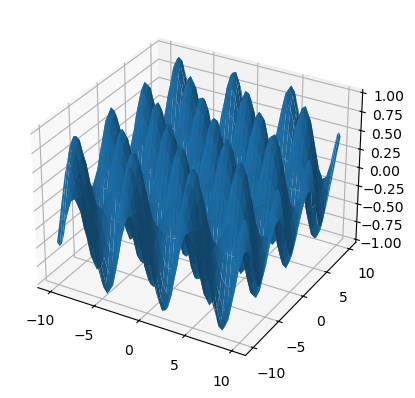

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=np.linspace(-10,10)
y=np.linspace(-10,10)
X,Y=np.meshgrid(x,y) 
ax.plot_surface(X,Y, objective([X,Y]))
plt.show()

In [70]:
result = optimize.differential_evolution(objective, bounds=[(-10, 10), (-10, 10)])
result

             message: Optimization terminated successfully.
             success: True
                 fun: -0.9999999999999936
                   x: [-4.712e+00 -9.425e+00]
                 nit: 37
                nfev: 1146
          population: [[-4.718e+00 -9.421e+00]
                       [-4.943e+00 -9.360e+00]
                       ...
                       [-4.628e+00 -9.488e+00]
                       [ 1.643e+00 -9.431e+00]]
 population_energies: [-1.000e+00 -9.715e-01 ... -9.945e-01 -9.974e-01]
                 jac: [-7.772e-08  7.772e-08]

### Sparse Matrices

In [72]:
from scipy import sparse

In [73]:
help(sparse.diags)

Help on function diags in module scipy.sparse._construct:

diags(diagonals, offsets=0, shape=None, format=None, dtype=None)
    Construct a sparse matrix from diagonals.

    .. warning::

        This function returns a sparse matrix -- not a sparse array.
        You are encouraged to use ``diags_array`` to take advantage
        of the sparse array functionality.

    Parameters
    ----------
    diagonals : sequence of array_like
        Sequence of arrays containing the matrix diagonals,
        corresponding to `offsets`.
    offsets : sequence of int or an int, optional
        Diagonals to set:
          - k = 0  the main diagonal (default)
          - k > 0  the kth upper diagonal
          - k < 0  the kth lower diagonal
    shape : tuple of int, optional
        Shape of the result. If omitted, a square matrix large enough
        to contain the diagonals is returned.
    format : {"dia", "csr", "csc", "lil", ...}, optional
        Matrix format of the result. By default (f

In [79]:
A = sparse.diags([1, -2, 1], [-1, 0, 2], shape=(1000, 1000))
b = np.ones(1000)
A.toarray()

array([[-2.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1., -2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1., -2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [80]:
# Solve the system Ax = b
x = sparse.linalg.spsolve(A, b)
x

/tmp/ipykernel_7389/3466378544.py:2: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = sparse.linalg.spsolve(A, b)


array([-381.4938753 , -616.88809072, -761.98775059, -851.28230614,
       -906.08741046, -939.57686168, -959.89251479, -972.0663129 ,
       -979.2081679 , -983.24011102, -985.35002289, -986.27205413,
       -986.45993477, -986.19408538, -985.6478154 , -984.92823598,
       -984.10154543, -983.20865656, -982.27485488, -981.31576769,
       -980.3410532 , -979.3566805 , -978.36633871, -977.37230781,
       -976.37599691, -975.37827691, -974.37968602, -973.3805569 ,
       -972.38109513, -971.38142778, -970.38163336, -969.38176042,
       -968.38183895, -967.38188748, -966.38191748, -965.38193602,
       -964.38194747, -963.38195455, -962.38195893, -961.38196164,
       -960.38196331, -959.38196434, -958.38196498, -957.38196537,
       -956.38196562, -955.38196577, -954.38196586, -953.38196592,
       -952.38196595, -951.38196598, -950.38196599, -949.381966  ,
       -948.381966  , -947.38196601, -946.38196601, -945.38196601,
       -944.38196601, -943.38196601, -942.38196601, -941.38196

In [82]:
A @ x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Spatial Data Analysis with `scipy.spatial`
#### Distance Computation

In [83]:
from scipy.spatial import distance

# Define two points in 2D space
point1 = [1, 2]
point2 = [4, 6]

# Compute Euclidean distance
euclidean_dist = distance.euclidean(point1, point2)
print("Euclidean Distance:", euclidean_dist)

# Compute Manhattan distance
manhattan_dist = distance.cityblock(point1, point2)
print("Manhattan Distance:", manhattan_dist)

Euclidean Distance: 5.0
Manhattan Distance: 7


#### Pairwise distances
We can compute the pairwise distances between points in a dataset, which is useful for clustering or nearest-neighbor searches.

In [84]:
# Define a set of points
points = np.array([[1, 2], [3, 4], [5, 6]])

# Compute the pairwise distances (Euclidean)
pairwise_distances = distance.pdist(points, metric='euclidean')
print("Pairwise distances:", pairwise_distances)

Pairwise distances: [2.82842712 5.65685425 2.82842712]


#### KD-Trees
A KD-tree (k-dimensional tree) is a data structure that partitions points into space for efficient querying, especially for nearest-neighbor searches. It's highly efficient when dealing with large datasets in higher-dimensional spaces.

In [85]:
from scipy.spatial import KDTree

# Define a set of points in 2D space
points = np.array([[1, 2], [3, 5], [4, 6], [7, 8]])

# Construct the KDTree
tree = KDTree(points)

# Query the nearest neighbor to the point (5, 5)
dist, idx = tree.query([5, 5])
print(f"Nearest neighbor to (5,5): {points[idx]}, Distance: {dist}")

Nearest neighbor to (5,5): [4 6], Distance: 1.4142135623730951


We can query the KD-tree for the nearest neighbor, all points within a certain radius, or k-nearest neighbors.

In [87]:
# Query the two nearest neighbors to the point (5, 5)
distances, indices = tree.query([5, 5], k=2)
print(f"2 nearest neighbors: {points[indices]}, Distances: {distances}")

# Query all points within a radius of 3 units from (5, 5)
indices = tree.query_ball_point([5, 5], r=4)
print(f"Points within radius 3: {points[indices]}")

2 nearest neighbors: [[4 6]
 [3 5]], Distances: [1.41421356 2.        ]
Points within radius 3: [[3 5]
 [4 6]
 [7 8]]


#### Convex Hull
A convex hull is the smallest convex shape that encloses a set of points. This is useful in computer graphics, collision detection, and clustering.

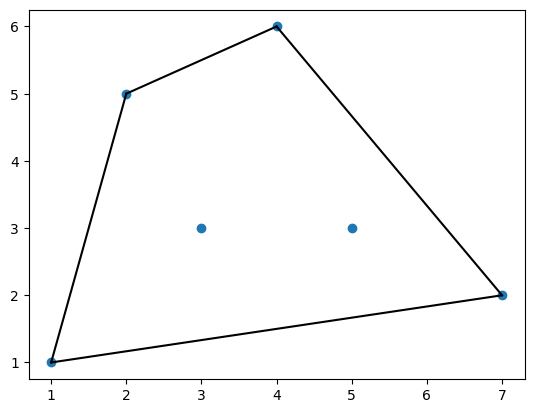

In [88]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# Define a set of 2D points
points = np.array([[1, 1], [2, 5], [3, 3], [5, 3], [4, 6], [7, 2]])

# Compute the convex hull
hull = ConvexHull(points)

# Plotting the convex hull
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.show()

In [90]:
hull.area

17.44193613341567

- Find the area and perimeter of the previous convex hull.

#### Voronoi Diagrams
A Voronoi diagram partitions a space into regions based on the distance to a specific set of points. Each region contains all the points closer to one input point than to any other.

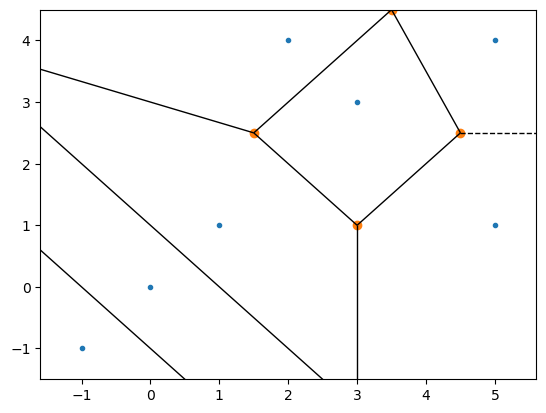

In [96]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# Define a set of 2D points
points = np.array([[1, 1], [2, 4], [3, 3], [5, 1], [5, 4]])

# Compute the Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
voronoi_plot_2d(vor)
plt.show()

In [92]:
vor.ridge_points

array([[2, 3],
       [2, 0],
       [2, 1],
       [2, 4],
       [3, 0],
       [3, 4],
       [0, 1],
       [1, 4]], dtype=int32)

## Constants

In [97]:
from scipy import constants

## Statistics
### Descriptive Statistics

In [99]:
from scipy import stats
import numpy as np

data = np.random.randn(1000)

# Calculate mean, variance, skewness, and kurtosis
mean = np.mean(data)
variance = np.var(data)
skewness = stats.skew(data)
kurt = stats.kurtosis(data)

print(f"Mean: {mean}, Variance: {variance}, Skewness: {skewness}, Kurtosis: {kurt}")

Mean: 0.04685424471950334, Variance: 1.0682216243264744, Skewness: 0.010842139233896066, Kurtosis: -0.23057854273532996


#### Chi-Square Tests

The chi-square test is used to test for independence between two categorical variables or for goodness-of-fit between observed and expected frequencies.

- `chi2_contingency`: Used for testing independence in a contingency table.
- `chisquare`: Used for a goodness-of-fit test.

In [100]:
from scipy.stats import chi2_contingency

# Contingency table: rows represent one categorical variable, columns represent another
contingency_table = np.array([[10, 20, 30], [6, 9, 17]])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")


Chi-square statistic: 0.27157465150403504, p-value: 0.873028283380073


### Kolmogorov-Smirnov Test
The Kolmogorov-Smirnov (KS) test compares a sample with a reference probability distribution or compares two samples to test whether they come from the same distribution.

In [108]:
from scipy.stats import kstest

# Generate random data from a normal distribution
data = np.random.randn(10000000)

# Perform KS test against a standard normal distribution
ks_stat, p_value = kstest(data, 'norm')

print(f"KS statistic: {ks_stat}, p-value: {p_value}")

KS statistic: 0.00021442761324272364, p-value: 0.7472621696220333


### Statistical Modeling

In [109]:
from scipy.stats import linregress

# Generate random data with a linear trend
x = np.random.rand(100)
y = 2 * x + np.random.randn(100) * 0.1

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 1.9845012326767617, Intercept: -0.004927337760756378


In [110]:
r_value

np.float64(0.9828078788472512)